In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('placement.csv')

In [26]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


C:\Users\st057\AppData\Local\Temp\ipykernel_32460\3772540942.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\st057\AppData\Local\Temp\ipykernel_32460\3772540942.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['package'])


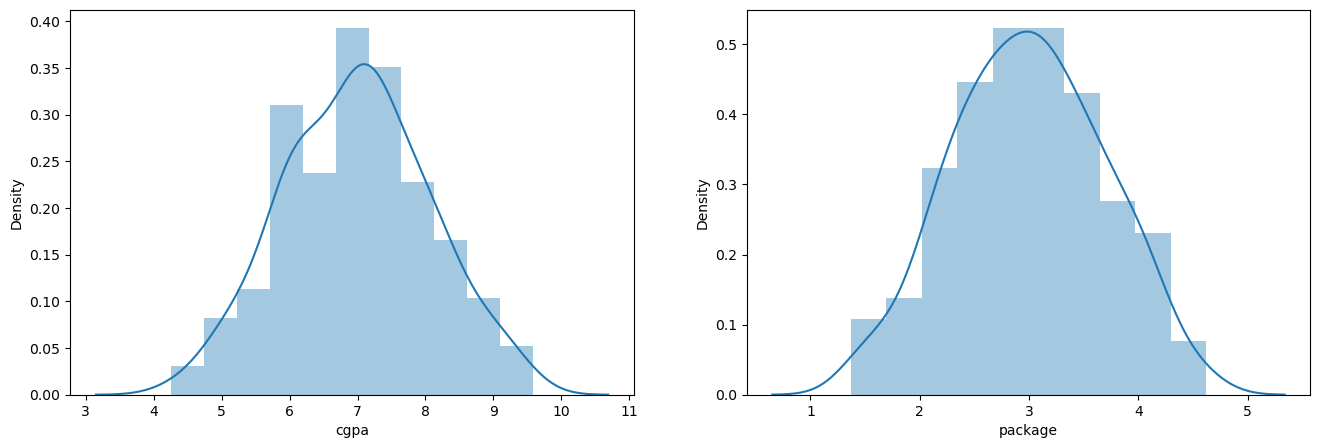

In [27]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['package'])

plt.show()

In [28]:
df['package'].describe()

count    200.000000
mean       2.996050
std        0.691644
min        1.370000
25%        2.487500
50%        2.995000
75%        3.492500
max        4.620000
Name: package, dtype: float64

<Axes: ylabel='package'>

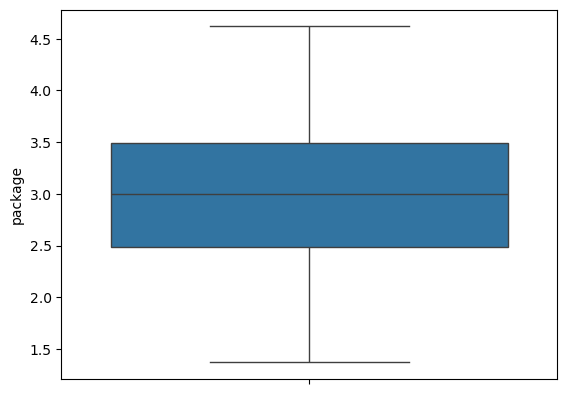

In [29]:
sns.boxplot(df['package'])

In [30]:
# Finding the IQR
percentile25 = df['package'].quantile(0.25)
percentile75 = df['package'].quantile(0.75)

In [31]:
percentile75

3.4925

In [32]:
iqr = percentile75 - percentile25

In [33]:
iqr

1.005

In [34]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [35]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 5.0
Lower limit 0.9800000000000004


# Finding outliers

In [36]:
df[df['package'] > upper_limit]

,cgpa,package


In [37]:
df[df['package'] < lower_limit]

,cgpa,package


# Trimming

In [38]:
new_df = df[df['package'] < upper_limit]

In [39]:
new_df.shape

(200, 2)

C:\Users\st057\AppData\Local\Temp\ipykernel_32460\391620962.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['package'])
C:\Users\st057\AppData\Local\Temp\ipykernel_32460\391620962.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['package'])


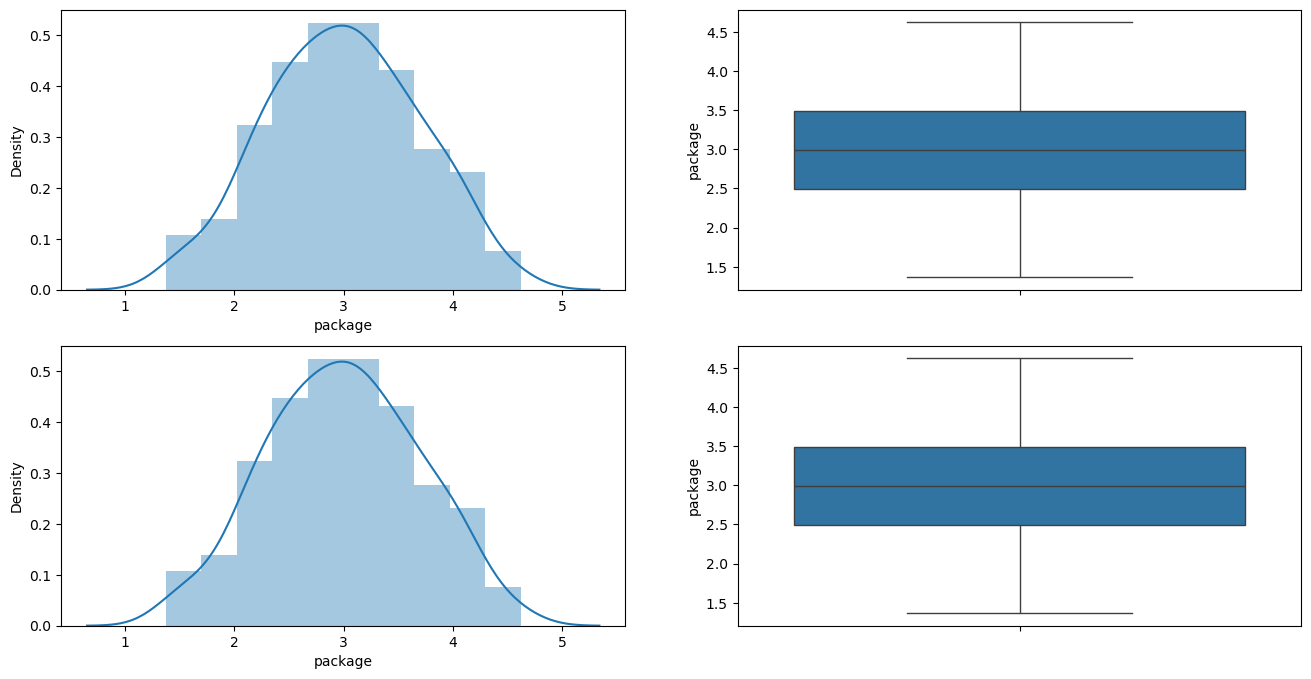

In [40]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['package'])

plt.subplot(2,2,2)
sns.boxplot(df['package'])

plt.subplot(2,2,3)
sns.distplot(new_df['package'])

plt.subplot(2,2,4)
sns.boxplot(new_df['package'])

plt.show()

# Capping

In [41]:
new_df_cap = df.copy()

new_df_cap['package'] = np.where(
    new_df_cap['package'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['package'] < lower_limit,
        lower_limit,
        new_df_cap['package']
    )
)

In [44]:
#np.where(condition,true,false)

In [43]:
new_df_cap.shape

(200, 2)

C:\Users\st057\AppData\Local\Temp\ipykernel_32460\570423299.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['package'])
C:\Users\st057\AppData\Local\Temp\ipykernel_32460\570423299.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['package'])


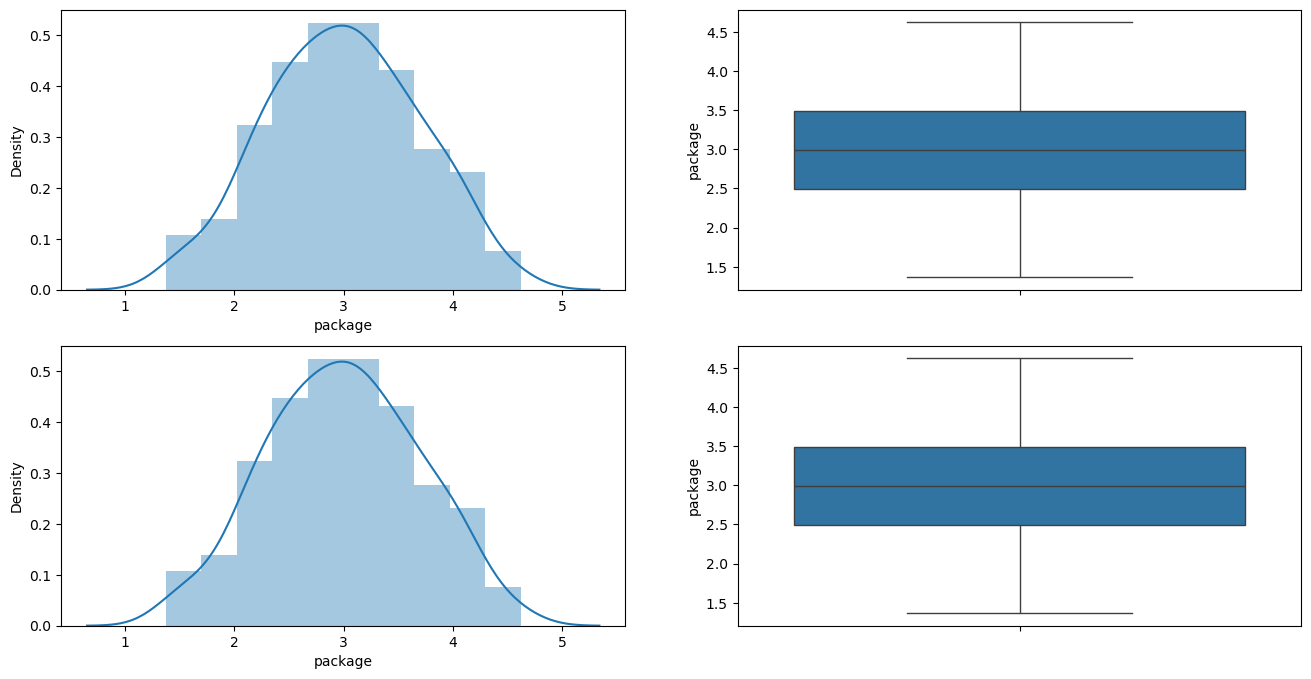

In [22]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['package'])

plt.subplot(2,2,2)
sns.boxplot(df['package'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['package'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['package'])

plt.show()